In [25]:
import numpy as np 

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [11]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process

    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

        self.best_sse = 10**20


    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        #problem 1
          

        self.myu = X[np.random.choice(len(X), self.n_clusters, False)]

        for j in range(self.max_iter):
            self._update_cluster(X)
            self._update_centroid()   
            self._SSE_(X)

            if self.verbose:
                print(f" interation: {j}, best SSE: {self.best_sse}")

            if np.mean(self.myu) <= self.tol:
                break
        
            


        return self

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.array([])
        # loop through all test data set
        for i in range(len(X)):
            d = 10**20
            for j in range(self.record_cluster):
                dist = np.linalg.norm(X[i] - self.record_myu[j])

                if dist < d:
                    d = dist 
                    y_pred = np.append(y_pred, j)
        return y_pred

    
    def _SSE_(self, X):
        sse = 0
        for n in range(len(X)):
            for k in range(self.n_clusters):
                sse += np.sum((X[n] - self.myu[k])**2)            
        if self.best_sse > sse:
          self.best_sse = sse
          self.record_myu = self.myu
          self.record_cluster = self.n_clusters

    def _update_cluster(self, X):
        a = np.ones(X.shape[0]).reshape(-1, 1)
        self.X_cluster = np.hstack([X, a])
        # loop through all data point
        for i in range(len(X)):
            d = 10 ** 20
            # loop through the centroids
            for j in range(self.n_clusters):
                
                #calculates euclidean distance between point and center
                dist = np.linalg.norm(X[i] - self.myu[j])

                #assign data point to closest cluster
                if dist < d:
                    d = dist
                    self.X_cluster[i, -1] = j

    def _update_centroid(self):
        
        for i in range(self.n_clusters):
            self.myu[i] = np.mean(self.X_cluster[self.X_cluster[:, -1]== i, : -1], axis=0)


        

        
    
            
                
            
        



In [27]:
X, _ = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0, shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(X, _, test_size=0.3)

In [4]:
clusters = X[np.random.choice(len(X), 4, replace=False)]

In [9]:
a = np.ones(len(X)).reshape(-1, 1)

xa = np.hstack([X, a])


In [13]:
sse = 0
for x in range(len(X)):
    d = 100000
    for j in range(len(clusters)): 
        dist = np.linalg.norm(X[x] - clusters[j])
        if dist < d:
            d = dist
            xa[x, -1] = j
      


In [5]:
test = {
    0: X[0: 10], 
    1: X[10: 20], 
    2: X[20: 30]
}


In [70]:
a = np.ones(X.shape[0]).reshape(-1, 1)

test = np.hstack([X, a])

In [29]:
x_train.shape

(140, 2)

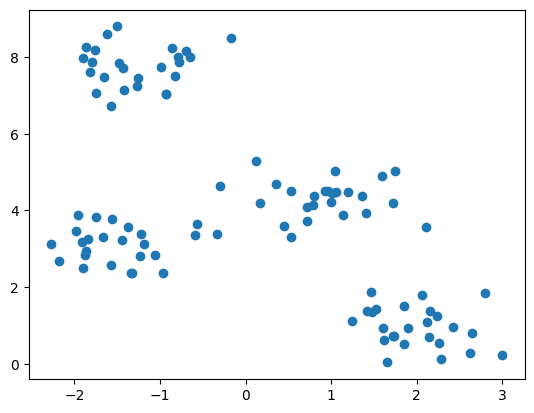

In [19]:
plt.scatter(X[:, 0], X[:, 1])

In [30]:
model = ScratchKMeans(3, 4, 500, 0.5).fit(x_train)

In [34]:
model.predict(x_test).shape
model.record_myu

array([[ 1.60522798,  2.50199981],
       [-1.30793625,  7.75384319],
       [-1.33186072,  3.17522924]])

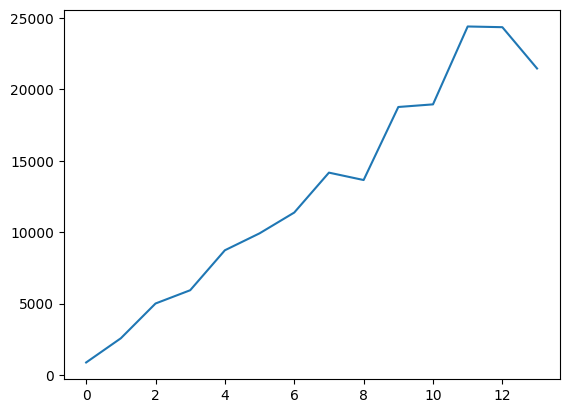

In [18]:
losses = []
for i in range(1, 15):
    m = ScratchKMeans(i, 4, 500, 0.5).fit(X)
    losses.append(m.best_sse)

plt.plot(losses)